##Installing Dependencies and Version check


In [8]:
# Use the command below to install any dependencies your system is missing
# !pip install -q sklearn-classification_report

import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(numpy.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Pandas : {}'.format(pandas.__version__))
print('Scikit-Learn : {}'.format(sklearn.__version__))

Python : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Numpy : 1.18.4
Matplotlib : 3.2.1
Pandas : 1.0.3
Scikit-Learn : 0.22.2.post1


##Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing, model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold

from pandas.plotting import scatter_matrix

##Importing the Dataset


In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 
         'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

# Class -> 4 = Malignant, 2 = Benign
df = pd.read_csv(url, names = names)

##Preprocessing and Visualization of dataset

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 11)
<bound method NDFrame.describe of           id  clump thickness  ...  mitoses  class
0    1000025                5  ...        1      2
1    1002945                5  ...        1      2
2    1015425                3  ...        1      2
3    1016277                6  ...        1      2
4    1017023                4  ...        1      2
..       ...              ...  ...      ...    ...
694   776715                3  ...        1      2
695   841769                2  ...        1      2
696   888820                5  ...        2      4
697   897471                4  ...        1      4
698   897471                4  ...        1      4

[699 rows x 11 columns]>


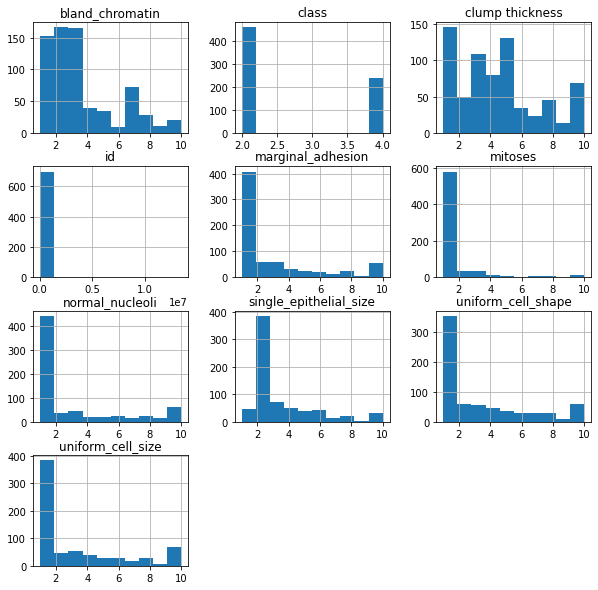

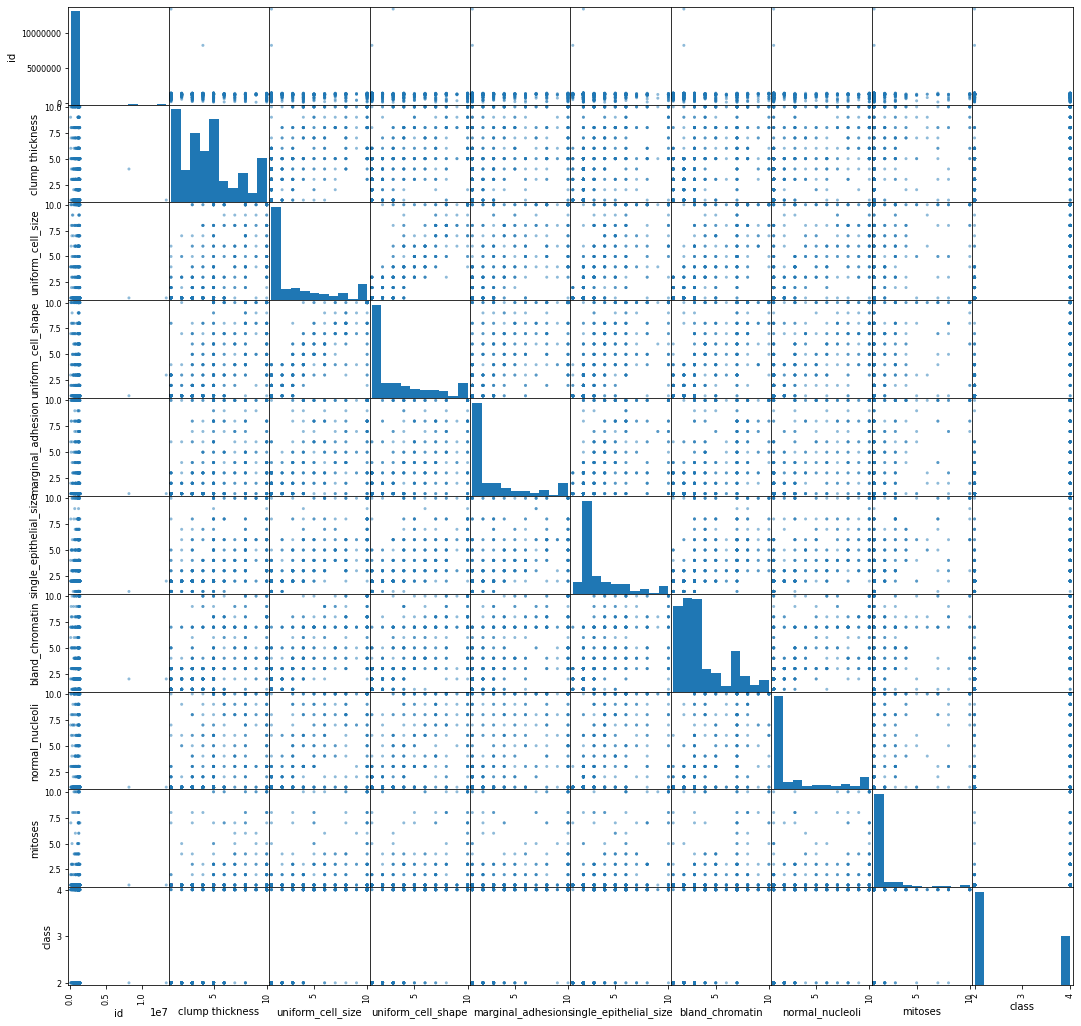

In [11]:
# Taking care of missing data : If the dataframe returns '?', just ignore it and set to -99999
df.replace('?', -99999, inplace = True)
print(df.axes)

# Excluding id from the dataset as it is not useful in prediction
df.drop(['id'], axis=1)

# Printing the final shape of the dataset
print(df.shape)

# Visualization of dataset
print(df.describe)

# Plotting histogram for each variable
df.hist(figsize = (10, 10))
plt.show()

# Creating scatter plot matrix : To find out whether to use a linear classifier or not
scatter_matrix(df, figsize = (18,18))
plt.show()

##Splitting the dataset and defining evaluation metrics

In [0]:
X = np.array(df.drop(['class', 'id'], 1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

seed = 8
scoring = 'accuracy'

##Defining the training models and training in K folds


In [13]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

names = []
results = []

for name, model in models :
          KFold = model_selection.KFold(n_splits = 10, random_state = seed)
          cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = KFold, scoring = scoring)
          results.append(cv_results)
          results.append(name)
          msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
          print(msg)

KNN : 0.973182 (0.019951)
SVM : 0.661786 (0.079364)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


##Predicting the results on Test Set and analyzing reports

In [14]:
for name, model in models :
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(name)
        print(accuracy_score(y_test, predictions))
        print(classification_report(y_test, predictions))

KNN
0.9357142857142857
              precision    recall  f1-score   support

           2       0.93      0.97      0.95        88
           4       0.94      0.88      0.91        52

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

SVM
0.6285714285714286
              precision    recall  f1-score   support

           2       0.63      1.00      0.77        88
           4       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Predicting a new result


In [15]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

example = np.array([[4, 10, 1, 10, 1, 4, 8, 2, 9]])
example = example.reshape(len(example), -1)
prediction = classifier.predict(example)
print(prediction)

0.9357142857142857
[4]
